<a href="https://colab.research.google.com/github/subbugalam47/DSML-SCALER/blob/master/L10_Signature_verification_using_siamese_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
- You are working as Data scientist in HDFC bank.   
  - You have a new account holder in your bank and would like to set his signature for verification.
- You have only one sample signature from the member.  
- Being a DataScientist , How can you use a neural network to perform the signature verification?

<center><img src = 'https://drive.google.com/uc?id=1wcp9rW4zygc8UYb6KgGz_jGT7oYt7Cf1' height=300 width=400>

### **TASK:** Verify whether a Signature of a person is Genuine or Forged

### What is the difference between Image Classification and Image verification?

- Identifying the class of object present in the image is called as **Image Classification**
- Checking whether a image is matching with another image is called as **Image verification**

### Can we use Traditional CNN (Convolutional Neural Networks) to solve this task?

- Let us assume we have a company of 1000 employees.
- We decide to implement a facial recognition system to record the attendance of your employees.
- If we were to use traditional neural networks, we will have to face two main problems
 - First one would be the dataset.
 - It would be nearly impossible to assemble a huge collection of dataset from each of our employees.
 - But a traditional CNN won’t be able to learn features with such small collection.

- We’ll also end up with 1000 output classes
- Let’s consider that somehow we got a huge dataset from each of our employees and we trained a really good CNN model.

#### What happens when a new employee joins our organization? How can we include the person into our facial recognition system?

All these shortcomings can be overcome using a new architecture known as **siamese networks** architecture or **One-shot learning** architecture.

#### **Quiz-1**
Face verification requires comparing a new picture against one person’s face, whereas face recognition requires comparing a new picture against K person’s faces.

> (a) True

> (b) False

**Ans:** (a) True

**Explanation:**
- Face verification requires you to be sure that the person seeing the picture is actually the same person who is authorized to see it; face recognition does not.
- With face recognition, you don’t know which face you’re looking for; with face verification, you do.

## What is a Siamese Network?
   - https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

<center> <img src='https://drive.google.com/uc?id=1oPZvZ9wRBlY-py8aCb80YsbNvt0tDtIc' width=600 height=400>


- A **Siamese neural network** is an artificial neural network that contains two or more identical subnetwork which is also known as **twin neural network** or **sister network**.
- Siamese network takes two different inputs passed through two similar subnetworks with the same architecture, parameters, and weights.
- It is used to find the similarity of the inputs by comparing its feature vectors, so these networks are used in many applications
- These networks are used to find the similarity of the inputs by comparing their feature vectors (feature embeddings).
- The two subnetworks are a mirror image of each other, just like the Siamese twins. Hence, any change to any subnetworks architecture, parameter, or weights is also applied to the other subnetwork.
- The two subnetwork outputs an encoding to calculate the difference between the two inputs.


### Why is Siamese Neural Network called One-shot Classification?

<center><img src='https://drive.google.com/uc?id=179PPEH5yS05ra6OFnKOOlGIcvrqTM7nw' width=400 height=300>


- A one-shot classification model correctly makes predictions with just a single training example of each new class.

- Siamese network uses a supervised training approach to learn generic input features then, based on the training data, it makes predictions about unknown class distributions.

- Trained Siamese network uses one-shot learning to predict the similarity or dissimilarity between two inputs even when very few examples from these new distributions are available.


### What should be the loss function for siamese network?

- Siamese network’s objective is to classify if the two inputs are the same or different using the Similarity score.
- The Similarity score can be calculated using Binary cross-entropy, Contrastive function, or Triplet loss, which are techniques for the general distance metric learning approach.
- Since training of Siamese networks involves pairwise learning usual, Cross entropy loss cannot be used in this case, mainly two loss functions are used, they are
 - **Contrastive loss**
   - In Contrastive loss, pairs of images are taken. For same class pairs, distance is less between them.
   - For different pairs, distance is more. Although binary cross-entropy seems like a perfect loss function for our problem, the contrastive loss does a better job differentiating between image pairs.
   <center><img src='https://drive.google.com/uc?id=1mXYhj994tOlcLsxbVqE1zVwP0FMPJTIS' width=600 height=300>
 - **Triplet loss**
   - Here, the model takes three inputs- anchor, positive, and negative.
   - The anchor is a reference input. Positive input belongs to the same class as anchor input.
   - Negative input belongs to a random class other than the anchor class.
   <center><img src='https://drive.google.com/uc?id=162ex2xZG1La0XwFlM8PDuif_WIZcX9UD' width=600 height=300>

### Installing Libraries

In [ ]:
!pip uninstall tensorflow --yes
!pip uninstall tensorflow_io --yes
!pip install tensorflow-gpu
!pip install --no-deps tensorflow_io
!pip install -q -U tensorflow-addons
!pip install tensorflow

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Successfully uninstalled tensorflow-2.9.1
Found existing installation: tensorflow-io 0.27.0
Uninstalling tensorflow-io-0.27.0:
  Successfully uninstalled tensorflow-io-0.27.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.0-py3-none-any.whl (5.9 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_io-0.27.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (25.0 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.10.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.0 MB)


In [ ]:
# Run this cell to solve DNN error

!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.0.5.39-1+cuda11.1
  Candidate: 8.5.0.96-1+cuda11.7
  Version table:
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda10.2

### Importing Libraries

In [ ]:
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
import tensorflow_io as tfio
from tensorflow.keras.applications import resnet
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
from tensorflow.keras import applications
from tensorflow.keras import metrics
import tensorflow_addons as tfa

from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime
import warnings
import matplotlib.image as mpimg
from functools import reduce
warnings.filterwarnings('ignore')


## Download Dataset:

- First install **gdown** using pip command(skip in colab-preinstalled)

    - **gdown** is used to download files from Google drive

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- Now downloading the Dataset using gdown and file id

In [ ]:
!gdown --id 0B29vNACcjvzVc1RfVkg5dUh2b1E

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=0B29vNACcjvzVc1RfVkg5dUh2b1E
To: /content/BHSig260.zip
100% 48.5M/48.5M [00:00<00:00, 76.8MB/s]


### About the Dataset:

- The dataset consists of 2 directories Hindi and Bengali Signatures.
- The Hindi directory consists of 160 sub-directories which are the signatures of 160 people
- The Bengali direcotry consists of 100 sub-directories which are the signatures of 100 people.
- Each person has 24 genuine Signatures followerd by  30 forged signatures.

Creating a directory to store the data

In [ ]:
!mkdir signatures

Un-zipping the data and saving in the directory

In [ ]:
! unzip BHSig260.zip -d signatures

Streaming output truncated to the last 5000 lines.
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-20.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-19.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-18.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-17.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-16.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-15.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-14.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-13.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-12.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-11.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-10.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-09.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-08.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-07.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-06.tif  
  in

For this task, we are using only the Hindi Signatures

In [ ]:
path = "./signatures/BHSig260/Hindi/"

Get the list of all directories and sort them

In [ ]:
dir_list = next(os.walk(path))[1]
dir_list.sort()

For each person segregate the genuine signatures from the forged signatures  
Genuine signatures are stored in the list **orig_groups**  
Forged signatures are stored in the list **forged_groups**         

---
Here, First 30 signatures in each folder are **forged**  
Next 24 signatures are **genuine**




In [ ]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forg_groups.append(images[:30])
    orig_groups.append(images[30:])

In [ ]:
len(orig_groups[0]),len(forg_groups[0])

(24, 30)

Lets quickly check to confirm we have data of all the 160 individuals

In [ ]:
len(orig_groups), len(forg_groups)

(160, 160)

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

Quick check to confirm that there are 24 Genuine signatures for each individual

In [ ]:
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


- The number of forged signatures for each person is 30
- Lets select only 24 forged signatures from each person.
- So that Genuine signatures and Forged signatures for each person will be equal

In [ ]:
for i in range(len(forg_groups)):
  forg_groups[i] = forg_groups[i][:24]

Both Genuine and Forged signatures are equal in number for all 160 persons

In [ ]:
len(orig_groups[0]),len(forg_groups[0])

(24, 24)

- The forged and Genuine signatures of a person is stored in separate list.
- We'll convert the nested list to a single list containing all the forged and genuine signatures in separate folders.
- So that Each genuine signature of a person has a corresponding Forged Signature.

Converting Nested list to single list using **reduce()** function from **functools**

In [ ]:
orig_groups_all = reduce(lambda x,y:x+y,orig_groups)
forg_groups_all = reduce(lambda x,y:x+y,forg_groups)

In [ ]:
len(orig_groups_all),len(forg_groups_all)

(3840, 3840)

Delete unnecessary variables to free some RAM

In [ ]:
del orig_groups, forg_groups

All the images will be converted to the same size before processing

In [ ]:
img_h, img_w = 224, 224

### Let's Visualize the Original and Forged Signature of a person

Function to randomly select a signature from train set and print two genuine copies and one forged copy

In [ ]:
def visualize_sample_signature():

    # Randomly selecting original and forged images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
    k = np.random.randint(len(orig_groups_all))
    orig_img_name = orig_groups_all[k]
    forg_img_name = forg_groups_all[k]

    # Reading the image
    orig_img1 = mpimg.imread(orig_img_name)
    forg_img  = mpimg.imread(forg_img_name)

    # Displaying the image
    ax1.imshow(orig_img1,cmap='gray')
    ax2.imshow(forg_img,cmap='gray')

    ax1.set_title('Genuine Copy')
    ax2.set_title('Forged Copy')

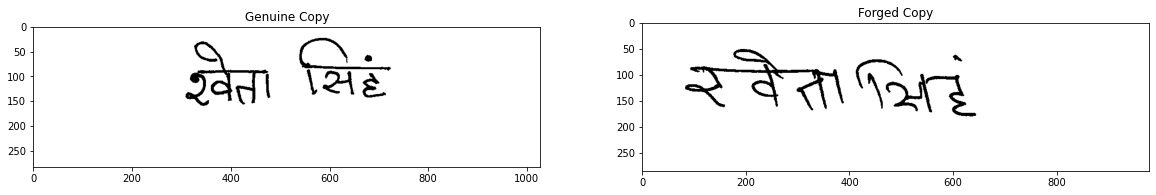

In [ ]:
visualize_sample_signature()

# Building the model:

we will build the siamese model and train it with 3 different types of losses:
- Binary Cross Entropy
- Contrastive loss
- Triplet loss

###Preparing data
Siamese Network has two identical sub-networks, one for the **input image** and other for the **validation image**.

For binary-crossentropy and contrastive loss functions, the dataset should be in the form
- (anchor_image,positive_image,1)
- (anchor_image,negative_image,0)

> Since anchor image and positive image are same, it is similar. So the label is 1

> Anchor image and negative image are dis-similar. So the label is 0


- In our signature verification task, we will construct positive pairs consisting of an anchor signature and an alternative (genuine) signature from the same author.
- We then construct negative pairs composed of an anchor signature and a forged signature authored by a different individual.


Since the anchor images and positive images should be same. We are using the images from **orig_groups_all** which consists of genuine signatures.

In [ ]:
anchor_images = []
for anc in orig_groups_all[:2000]:
  anchor_images.append(anc)

In [ ]:
positive_images = anchor_images.copy()

In [ ]:
len(anchor_images),len(positive_images)

(2000, 2000)

Since the negative images should be different from anchor and positive images. We are using **negative_images** from **forg_groups_all** which contains forg signatures.

In [ ]:
negative_images = []
for anc in forg_groups_all[:2000]:
  negative_images.append(anc)

In [ ]:
len(negative_images)

2000

Creating tf.data() pipeline for positive,negative and anchor images

In [ ]:
anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)

**tf.data.Dataset.zip()** is used for creating dataset by zipping together multiple arrays and tf objects.

In [ ]:
positives = tf.data.Dataset.zip((anchor_dataset,positive_dataset,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_images)))))
negatives = tf.data.Dataset.zip((anchor_dataset,negative_dataset,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_images)))))
data = positives.concatenate(negatives)

###Preprocessing the data
Let's start preprocessing the Dataset required for **Binary cross entropy** and **contrastive loss**.

In [ ]:
def preprocess_image(filename):

    # Read Image from the file path
    image_string = tf.io.read_file(filename)
    # Decodes a .tiff encoded image tensor of RGBA format (Output shape-[height,width,4])
    image = tfio.experimental.image.decode_tiff(image_string)
    # Selecting only the 3 channels of the image - RGB
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    # Combines multiple tensors
    image = tf.stack([r,g,b],axis=-1)
    # Resizing the image
    image = tf.image.resize(image, (224,224))
    return image


**preprocess_image()**

- Reads Image
- Converts .tiff to tensor
- resizes the image to size (224,224)

**preprocess_twin**
- Returns **(input_image,validation_image,label)**


Function to preprocess image and return the tuple consisting of

(input_image,validation_image,label)

In [ ]:
# We will use the same preprocess_image() function to preprocess the image

def preprocess_twin(input_img,validation_img,label):

    return (
        preprocess_image(input_img),
        preprocess_image(validation_img),
        label

    )

In [ ]:
example = data.as_numpy_iterator().next()

In [ ]:
len(example)

3

Installing tensorflow_io for decoding .tiff images using tensorflow

- **.shuffle()** - shuffles the samples in the dataset.

- **.map()** - transforms items in the dataset

In [ ]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=4000)

#### Training and Testing Partition of data

In [ ]:
# Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(32)
train_data = train_data.prefetch(8)

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*0.3))
test_data = test_data.batch(32)
test_data = test_data.prefetch(8)

Now, We have pre-processed the dataset and splitted into training and test partitions.

As we saw above, siamese network is a **twin network** which computes the similarity between the feature embeddings of the two images.


### How can we extract the embeddings from the image?

- We can use CNN (Convolutional Neural Network) for extracting the Image features.
- Since the siamese model is a **twin network** which means, their identical subnetworks have same configuration with same parameters and weights.
- So our base CNN model should be same.


#### **Quiz-2**
<img src="https://drive.google.com/uc?id=1i5vKKxSMKAQC9GTeSShOljdneh9RRCw0">

Which of the following do you agree with the most?

(a) This depicts two "different" neural networks with different architectures although we use the same drawing.

(b) Although we depict two neural networks and two images are combined in a single volume and pass through a single neural network

(c) The upper and lower neural networks depicted have exactly the same parameters

(d) The two neural networks depicted in the image have the same architecture, but they might have different parameters

**Ans:** (c) The upper and lower neural networks depicted have exactly the same parameters

**Explanation:**

- Siamese network contains two or more identical subnetwork which is also known as twin neural network.

- These networks are used to find the similarity of the inputs by comparing their feature vectors

- The two subnetworks are a mirror image of each other, just like the Siamese twins. Hence, any change to any subnetworks architecture, parameter, or weights is also applied to the other subnetwork.

###What should be the base CNN network?
- You can create Convolutions network from scratch extract features embeddings from the image.

- we can take the advantage of **pretrained models**

- Pretrained-models(Transfer learning) - You can also use pre-trained models like VGG16, Resnet50 to extract the feature embeddings.


- We will use the  pre-trained model **Resnet50** to train the embeddings to identify similar and dissimilar signatures
- ResNet-50 is a CNN that is 50 layers deep. It has been trained on millions of images from imagenet database and handles vanishing gradient problem in very deep CNNs.

In [ ]:
input_dim = (224,224,3)

In [ ]:
base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=input_dim, include_top=False
)

flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(512, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001))(flatten)
dense1 = layers.Dropout(0.3)(dense1)
# dense1 = layers.BatchNormalization()(dense1)
dense2 = layers.Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense1)
dense2 = layers.Dropout(0.3)(dense2)
# dense2 = layers.BatchNormalization()(dense2)
output = layers.Dense(256)(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")

trainable = False
for layer in base_cnn.layers:
    if layer.name == "conv5_block1_out":
        trainable = True
    layer.trainable = trainable

94765736/94765736 [==============================] - 2s 0us/step


## How to compare the embeddings?:

- For that we will distance metric called 'Euclidean distance' to find how similar the two signatures are.

- But you can also use Cosine similarity

Function to Calculate Euclidean distance to calculate similariity between the input image and the validation image:



In [ ]:
def euclidean_distance(vects):
    # Compute Euclidean Distance between two vectors
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

Function to return shape of euclidean distance layer

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

## Building the Siamese Model

In [ ]:
# Building Model for feature extraction
# base_network = build_base_network(input_dim)

# Shape of the Input
img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)
# label_inp = Input(shape=(1,))

# Extracting embeddings of the image
feat_vecs_a = embedding(resnet.preprocess_input(img_a))
feat_vecs_b = embedding(resnet.preprocess_input(img_b))

# Calculating euclidean distance between the images
distance = Lambda(lambda tensors:K.abs(tensors[0]-tensors[1]))([feat_vecs_a, feat_vecs_b])
prediction=Dense(1,activation='sigmoid')(distance)
model = Model([img_a, img_b],prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                 

Plotting the architecture of the siamese model

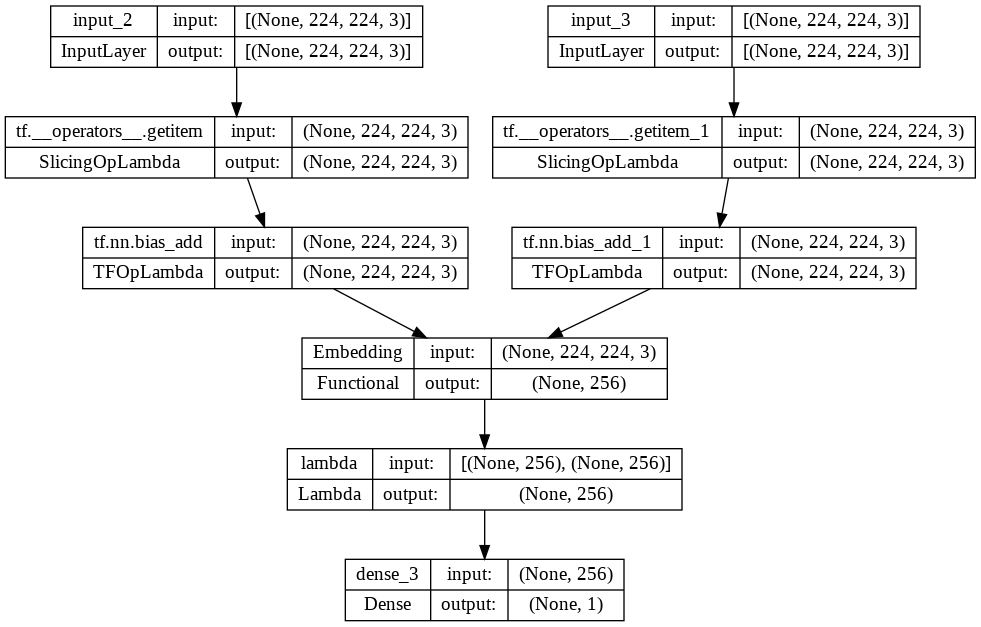

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Creating a directory **Weights_binary** to store the weights of the model at each epoch using **binary_crossentropy** loss function

In [ ]:
!mkdir Weights_binary

mkdir: cannot create directory ‘Weights_binary’: File exists


Using Adam optimizer

In [ ]:
opt = tf.keras.optimizers.Adam()

### 1. Using **Binary Crossentropy** as loss function

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
!mkdir training_checkpoints

mkdir: cannot create directory ‘training_checkpoints’: File exists


In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt,siamese_model = model)

Custom train function to train the model
- Finds loss between predicted and true value
- calculates gradients
- update weights and trains the model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
acc_metric = tf.keras.metrics.Accuracy()

In [ ]:
EPOCHS=10

### Training the model

In [ ]:
for epoch in range(EPOCHS):
  print(f"\nStart of Training Epoch {epoch+1}")
  for idx,batch in enumerate(train_data):
    with tf.GradientTape() as tape:
        y_pred = model(batch[:2],training=True)
        # y_pred = [1 if x>0.5 else 0 for x in y_pred]
        loss = binary_cross_loss(y_pred,batch[2])
    gradients = tape.gradient(loss,model.trainable_weights)
    opt.apply_gradients(zip(gradients,model.trainable_weights))
    acc_metric.update_state(batch[2],y_pred)

  train_acc = acc_metric.result()
  print(f"Accuracy over epoch {train_acc}")
  acc_metric.reset_states()


Start of Training Epoch 1
Accuracy over epoch 0.30642858147621155

Start of Training Epoch 2
Accuracy over epoch 0.5132142901420593

Start of Training Epoch 3
Accuracy over epoch 0.5760714411735535

Start of Training Epoch 4
Accuracy over epoch 0.6349999904632568

Start of Training Epoch 5
Accuracy over epoch 0.6814285516738892

Start of Training Epoch 6
Accuracy over epoch 0.6607142686843872

Start of Training Epoch 7
Accuracy over epoch 0.6567857265472412

Start of Training Epoch 8
Accuracy over epoch 0.6932142972946167

Start of Training Epoch 9
Accuracy over epoch 0.6875

Start of Training Epoch 10
Accuracy over epoch 0.668571412563324


#### Accuracy on Test data

In [ ]:
for idx,batch in enumerate(test_data):
  y_pred = model(batch[:2],training=True)
  acc_metric.update_state(y_pred,batch[2])

test_acc=acc_metric.result()
print(f"Accuracy on Test Set is {test_acc}")

Accuracy on Test Set is 0.7099999785423279


In [ ]:
test_input,test_val,y_true = test_data.as_numpy_iterator().next()

In [ ]:
y_hat = model.predict([test_input,test_val])

1/1 [==============================] - 3s 3s/step


#### Prediction of a test sample

In [ ]:
y_hat

array([[0.51233435],
       [0.        ],
       [0.        ],
       [0.51233435],
       [0.        ],
       [0.51233435],
       [0.51233435],
       [0.51233435],
       [0.05939759],
       [0.51233435],
       [0.51233435],
       [0.51233435],
       [0.51233435],
       [0.        ],
       [0.51233435],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.51233435],
       [0.        ],
       [0.99999654],
       [0.51233435],
       [0.51233435],
       [0.51233435],
       [0.        ],
       [0.51233435],
       [0.        ],
       [0.        ],
       [0.51233435],
       [0.51233435],
       [0.51233435]], dtype=float32)

Setting threshold as 0.5

If the prediction>0.5, then the output is 1 else 0

In [ ]:
y_hat_new = [1 if x>0.5 else 0 for x in y_hat]

#### Predicted y value

In [ ]:
y_hat_new

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1]

#### Actual y value

In [ ]:
y_true

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

### Prediction on Test Image pairs

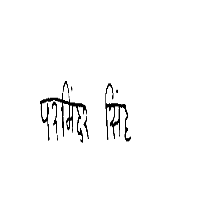

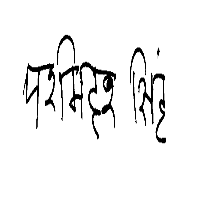

1/1 [==============================] - 0s 32ms/step
Predicted Label: Forged
Actual Label: Forged


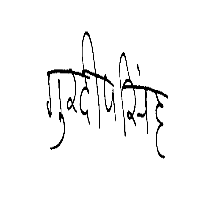

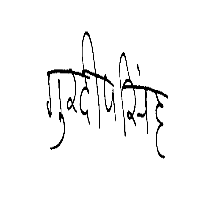

1/1 [==============================] - 0s 29ms/step
Predicted Label: Genuine
Actual Label: Genuine


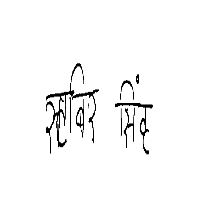

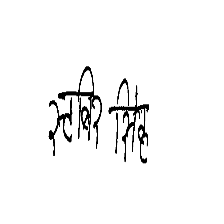

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


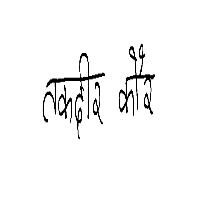

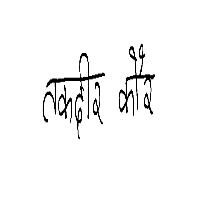

1/1 [==============================] - 0s 29ms/step
Predicted Label: Genuine
Actual Label: Genuine


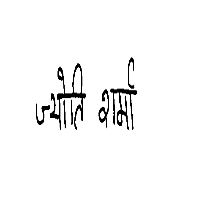

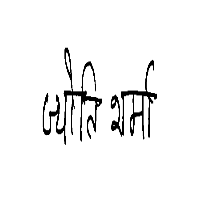

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


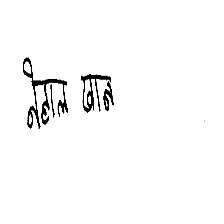

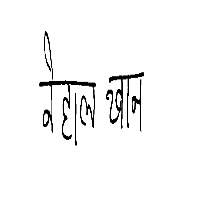

1/1 [==============================] - 0s 32ms/step
Predicted Label: Forged
Actual Label: Forged


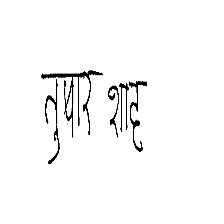

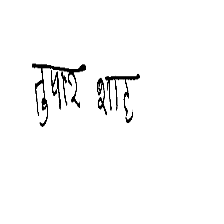

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


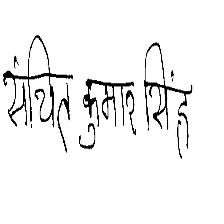

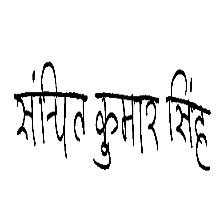

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


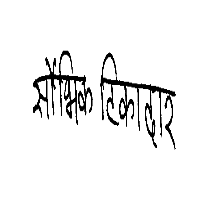

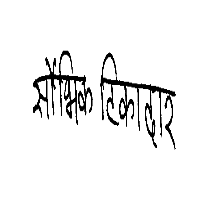

1/1 [==============================] - 0s 31ms/step
Predicted Label: Genuine
Actual Label: Genuine


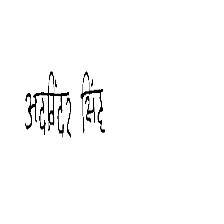

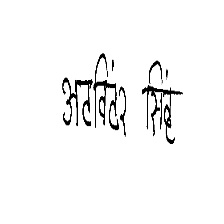

1/1 [==============================] - 0s 30ms/step
Predicted Label: Genuine
Actual Label: Forged


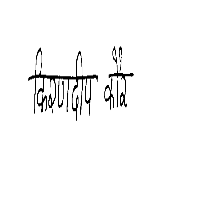

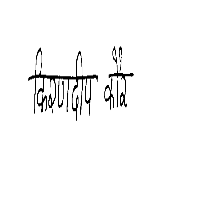

1/1 [==============================] - 0s 27ms/step
Predicted Label: Genuine
Actual Label: Genuine


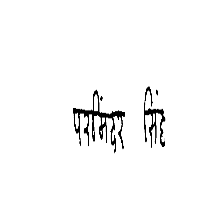

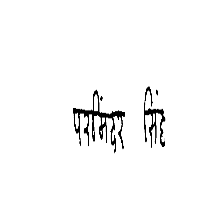

1/1 [==============================] - 0s 28ms/step
Predicted Label: Genuine
Actual Label: Genuine


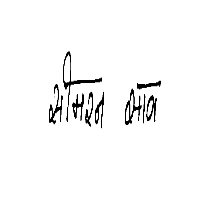

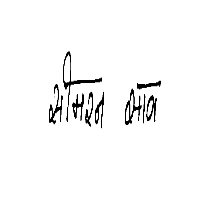

1/1 [==============================] - 0s 30ms/step
Predicted Label: Genuine
Actual Label: Genuine


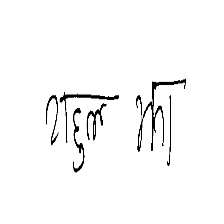

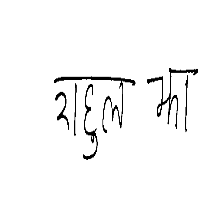

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


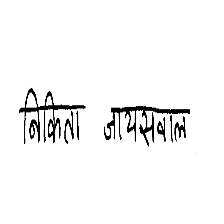

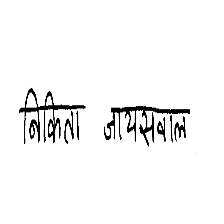

1/1 [==============================] - 0s 30ms/step
Predicted Label: Genuine
Actual Label: Genuine


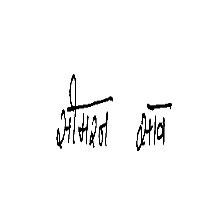

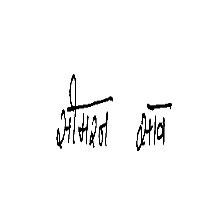

1/1 [==============================] - 0s 34ms/step
Predicted Label: Genuine
Actual Label: Genuine


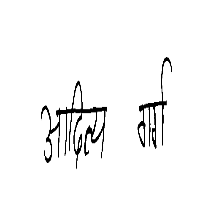

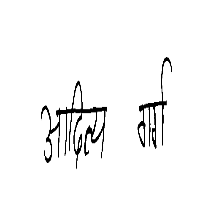

1/1 [==============================] - 0s 31ms/step
Predicted Label: Genuine
Actual Label: Genuine


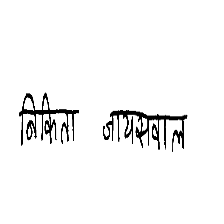

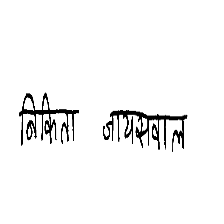

1/1 [==============================] - 0s 30ms/step
Predicted Label: Genuine
Actual Label: Genuine


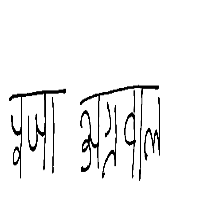

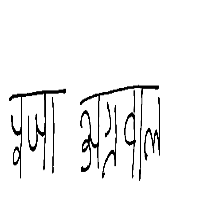

1/1 [==============================] - 0s 30ms/step
Predicted Label: Genuine
Actual Label: Genuine


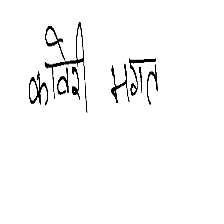

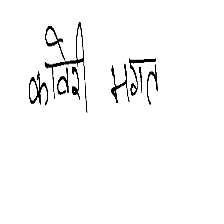

1/1 [==============================] - 0s 31ms/step
Predicted Label: Genuine
Actual Label: Genuine


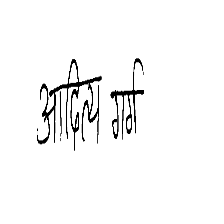

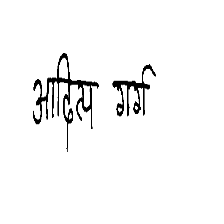

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


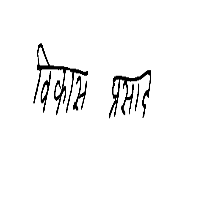

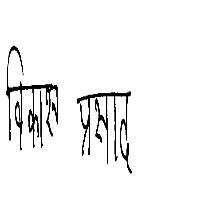

1/1 [==============================] - 0s 29ms/step
Predicted Label: Forged
Actual Label: Forged


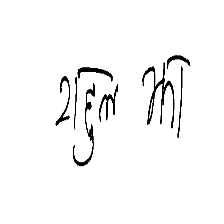

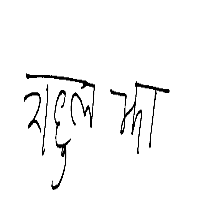

1/1 [==============================] - 0s 29ms/step
Predicted Label: Forged
Actual Label: Forged


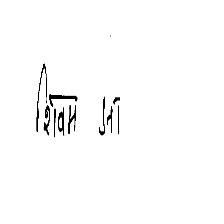

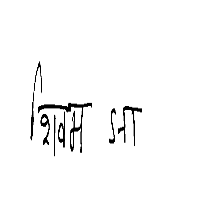

1/1 [==============================] - 0s 35ms/step
Predicted Label: Forged
Actual Label: Forged


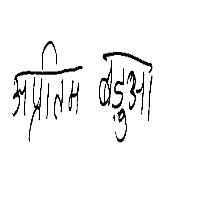

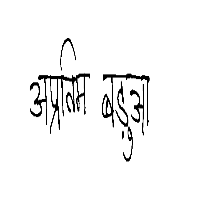

1/1 [==============================] - 0s 28ms/step
Predicted Label: Forged
Actual Label: Forged


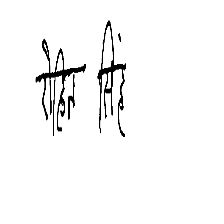

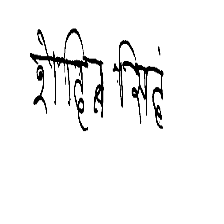

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


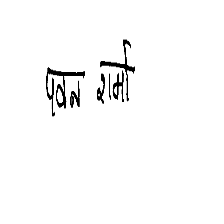

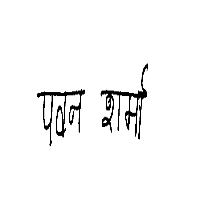

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


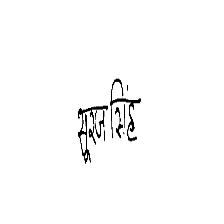

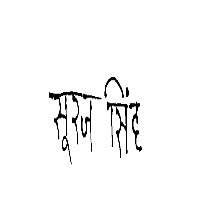

1/1 [==============================] - 0s 41ms/step
Predicted Label: Forged
Actual Label: Forged


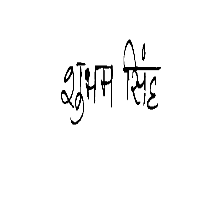

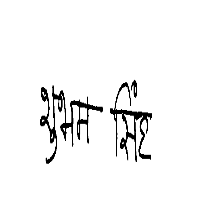

1/1 [==============================] - 0s 28ms/step
Predicted Label: Forged
Actual Label: Forged


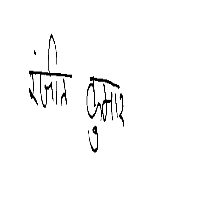

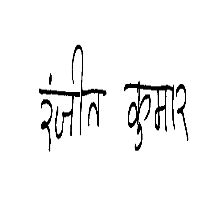

1/1 [==============================] - 0s 35ms/step
Predicted Label: Forged
Actual Label: Forged


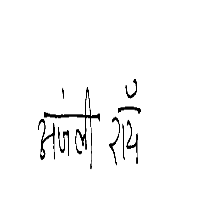

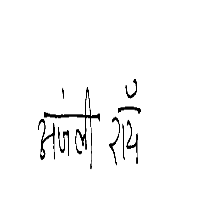

1/1 [==============================] - 0s 33ms/step
Predicted Label: Genuine
Actual Label: Genuine


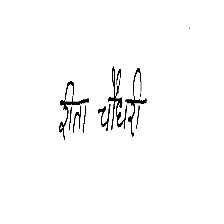

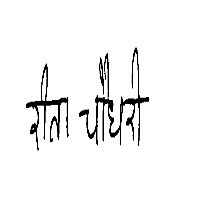

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


In [ ]:
for (img1,img2,y) in zip(test_input,test_val,y_true):
  cv2_imshow(img1)
  cv2_imshow(img2)
  pred_val = model.predict([tf.expand_dims(img1,axis=0),tf.expand_dims(img2,axis=0)])[0][0]
  pred_ans = ""
  if pred_val>0.5:
    pred_ans="Genuine"
  else:
    pred_ans='Forged'
  print("Predicted Label: {}".format(pred_ans))
  res = ""
  if y==1:
    res="Genuine"
  else:
    res="Forged"
  print("Actual Label: {}".format(res))
  # print("Cosine Similarity: {}".format(cosine(embedding(tf.expand_dims(img1,axis=0)),embedding(tf.expand_dims(img2,axis=0)))))

Training Accuracy: 66%
Test Accuracy: 70%

#### Can we improve the accuracy with Contrastive loss?

### Why binary cross-entropy loss is not used in siamese network?
- A siamese network distinguishes between 2 pictures rather than classifying them.
- So we need a better loss function so that the embeddings differentiates clearly between similar and dissimilar images.

Now let's try to train the model with another new loss function which is Contrastive loss

### 2.  **What is Contrastive loss?**

- Contrastive loss (also known as **pairwise ranking loss**) is a metric learning objective function where we learn from training data examples structured as pairs:
 - Positive pairs (examples that belong to the same class)
 - Negative pairs (examples that belong to different classes).
- The contrastive loss function is set up such that we minimize the distance between embeddings for positive pairs, and maximize the distance between embeddings for negative pairs.
- After each pass through the network, we ideally want to update the weights of our embedding model such that the above condition is satisfied.
- Contrastive loss can be implemented using a Siamese network architecture for the embedding model.
- This model takes in two inputs and uses a shared trunk network that produces two embeddings for each input.

<center><img src="https://drive.google.com/uc?id=1Sn3YgCRgxj0Tu5J1_LkjZpYQq_6trudL" width=700 height=600>

### Why contrastive loss is used?

A siamese network's purpose is to distinguish between picture pairings rather than classify them. Essentially, contrastive loss measures how well the siamese network distinguishes between picture pairings. The distinction is minor yet significant.

Contrastive Loss is defined as,

> $Y*D^2+(1-Y)*max(margin-D,0)^2$


where $D$ is the calculated distance between embeddings for each datapoint in the pair, and $m$ is a constant value of margin.

To break this equation down:


1.   The Y value is our label. It will be 1 if the image pairs are of the same class, and it will be 0 if the image pairs are of a different class.

2.   The D variable is the Euclidean distance between the outputs of the sister network embeddings.
3.   The max function takes the largest value of 0 and the margin, m, minus the distance.


<center><img src="https://drive.google.com/uc?id=1G_SkYCor4w2o4wvpns1vQSO51vMPtKhi" width=700 height=500></center>

How the loss value changes during training the model?
- In the case of **positive pairs**, the loss becomes positive only when we have a positive distance between vector representations.
- In the case of **negative pairs**, the loss is positive only when the distance between vectors is less than the margin.
- The **margin value** is a hyperparameter that serves as an upper threshold to constrain the amount of loss attributed to “easy to classify” pairs.




In [ ]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

In [ ]:
# Building Model for feature extraction
# base_network = build_base_network(input_dim)

# Shape of the Input
img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)
# label_inp = Input(shape=(1,))

# Extracting embeddings of the image
feat_vecs_a = embedding(resnet.preprocess_input(img_a))
feat_vecs_b = embedding(resnet.preprocess_input(img_b))

# Calculating euclidean distance between the images
distance = Lambda(lambda tensors:K.abs(tensors[0]-tensors[1]))([feat_vecs_a, feat_vecs_b])
prediction=Dense(1,activation='sigmoid')(distance)
model = Model([img_a, img_b],prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 224, 224, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                 

Training the model with **Adam** optimizer and **contrastive** loss using custom train loop

In [ ]:
model.compile(loss=contrastive_loss,optimizer='adam',metrics=['accuracy'])

In [ ]:
EPOCHS=10

Training the model using **Adam** optimizer and **contrastive loss**

In [ ]:
for epoch in range(EPOCHS):
  print(f"\nStart of Training Epoch {epoch}")
  for idx,batch in enumerate(train_data):
    with tf.GradientTape() as tape:
        y_pred = model(batch[:2],training=True)
        # y_pred = [1 if x>0.5 else 0 for x in y_pred]
        loss = contrastive_loss(y_pred,batch[2])
    gradients = tape.gradient(loss,model.trainable_weights)
    opt.apply_gradients(zip(gradients,model.trainable_weights))
    acc_metric.update_state(batch[2],y_pred)

  train_acc = acc_metric.result()
  print(f"Accuracy over epoch {train_acc}")
  acc_metric.reset_states()


Start of Training Epoch 0
Accuracy over epoch 0.7179999947547913

Start of Training Epoch 1
Accuracy over epoch 0.7149999737739563

Start of Training Epoch 2
Accuracy over epoch 0.720714271068573

Start of Training Epoch 3
Accuracy over epoch 0.706428587436676

Start of Training Epoch 4
Accuracy over epoch 0.7196428775787354

Start of Training Epoch 5
Accuracy over epoch 0.7200000286102295

Start of Training Epoch 6
Accuracy over epoch 0.7350000143051147

Start of Training Epoch 7
Accuracy over epoch 0.731071412563324

Start of Training Epoch 8
Accuracy over epoch 0.7174999713897705

Start of Training Epoch 9
Accuracy over epoch 0.727142870426178


Accuracy on Test Data

In [ ]:
for idx,batch in enumerate(test_data):
  y_pred = model(batch[:2],training=True)
  acc_metric.update_state(y_pred,batch[2])

test_acc=acc_metric.result()
print(f"Accuracy on Test Set is {test_acc}")

Accuracy on Test Set is 0.7300000190734863


In [ ]:
test_input,test_val,y_true = test_data.as_numpy_iterator().next()

In [ ]:
y_hat = model.predict([test_input,test_val])

1/1 [==============================] - 0s 52ms/step


Predicted y value

In [ ]:
y_hat

array([[0.        ],
       [0.51221114],
       [0.        ],
       [0.51221114],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.51221114],
       [1.        ],
       [0.51221114],
       [0.51221114],
       [0.51221114],
       [0.        ],
       [0.51221114],
       [0.51221114],
       [0.51221114],
       [0.51221114],
       [0.51221114],
       [0.51221114],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.51221114],
       [0.        ]], dtype=float32)

### Prediction on Test image pairs

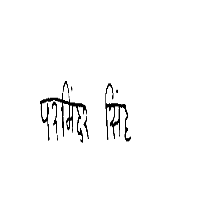

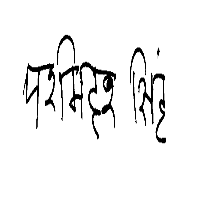

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


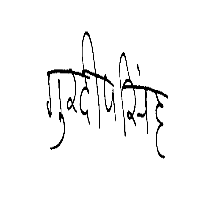

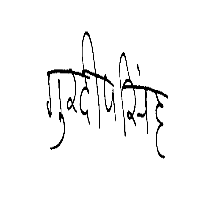

1/1 [==============================] - 0s 30ms/step
Predicted Label: Genuine
Actual Label: Genuine


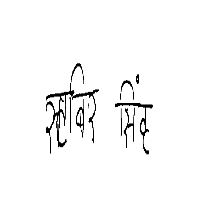

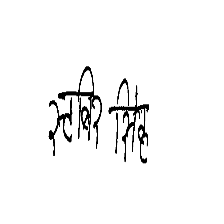

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


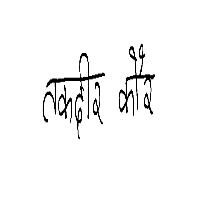

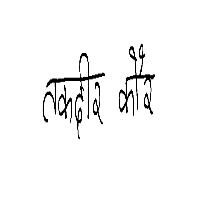

1/1 [==============================] - 0s 27ms/step
Predicted Label: Genuine
Actual Label: Genuine


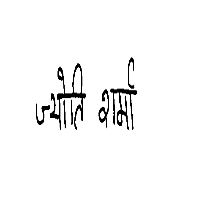

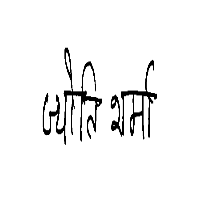

1/1 [==============================] - 0s 28ms/step
Predicted Label: Forged
Actual Label: Forged


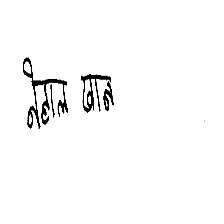

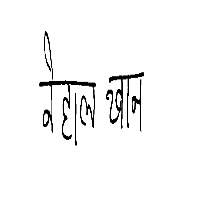

1/1 [==============================] - 0s 28ms/step
Predicted Label: Forged
Actual Label: Forged


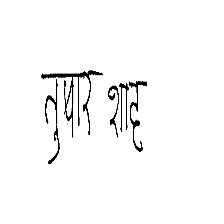

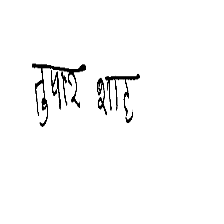

1/1 [==============================] - 0s 29ms/step
Predicted Label: Forged
Actual Label: Forged


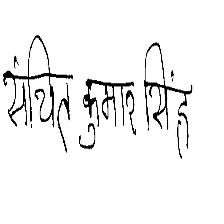

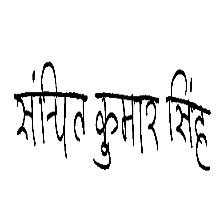

1/1 [==============================] - 0s 28ms/step
Predicted Label: Forged
Actual Label: Forged


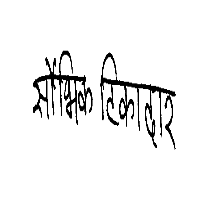

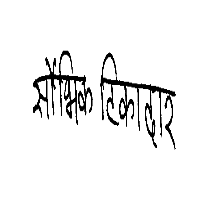

1/1 [==============================] - 0s 28ms/step
Predicted Label: Genuine
Actual Label: Genuine


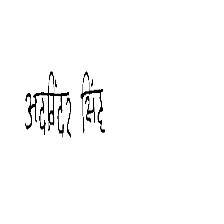

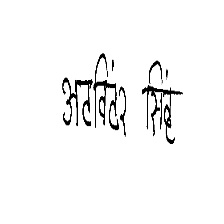

1/1 [==============================] - 0s 40ms/step
Predicted Label: Genuine
Actual Label: Forged


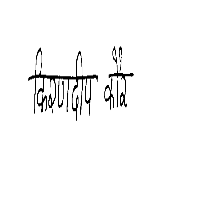

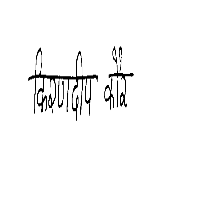

1/1 [==============================] - 0s 32ms/step
Predicted Label: Genuine
Actual Label: Genuine


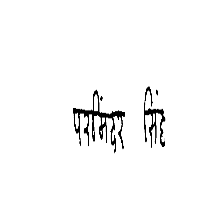

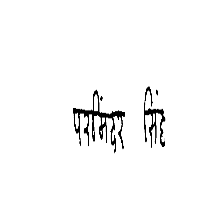

1/1 [==============================] - 0s 27ms/step
Predicted Label: Genuine
Actual Label: Genuine


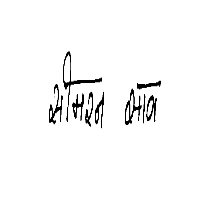

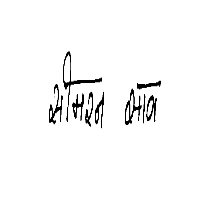

1/1 [==============================] - 0s 29ms/step
Predicted Label: Genuine
Actual Label: Genuine


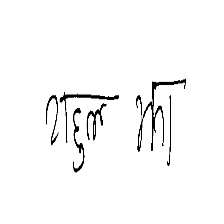

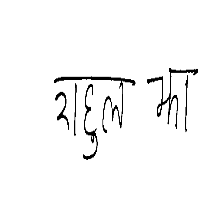

1/1 [==============================] - 0s 39ms/step
Predicted Label: Forged
Actual Label: Forged


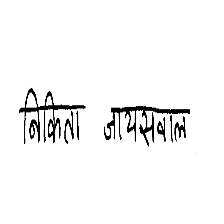

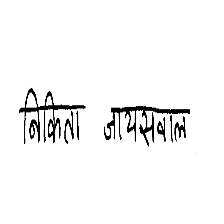

1/1 [==============================] - 0s 31ms/step
Predicted Label: Genuine
Actual Label: Genuine


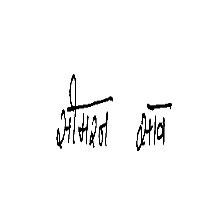

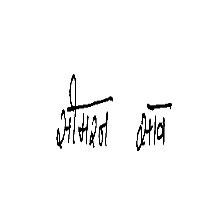

1/1 [==============================] - 0s 28ms/step
Predicted Label: Genuine
Actual Label: Genuine


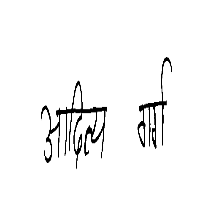

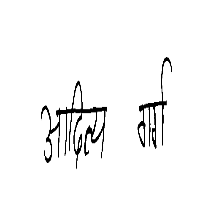

1/1 [==============================] - 0s 31ms/step
Predicted Label: Genuine
Actual Label: Genuine


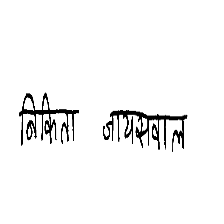

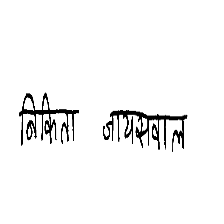

1/1 [==============================] - 0s 28ms/step
Predicted Label: Genuine
Actual Label: Genuine


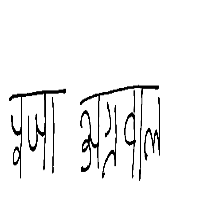

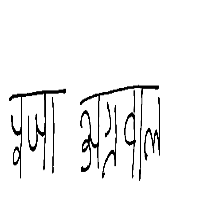

1/1 [==============================] - 0s 32ms/step
Predicted Label: Genuine
Actual Label: Genuine


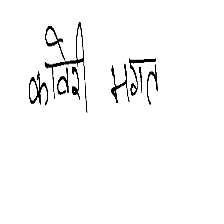

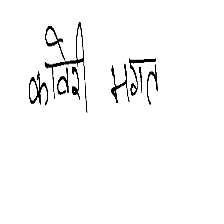

1/1 [==============================] - 0s 28ms/step
Predicted Label: Genuine
Actual Label: Genuine


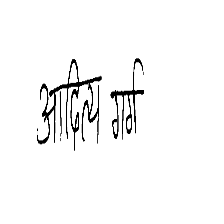

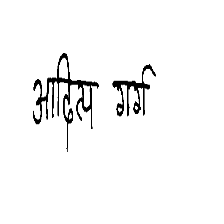

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


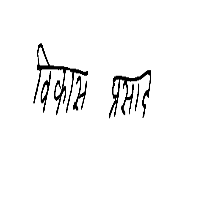

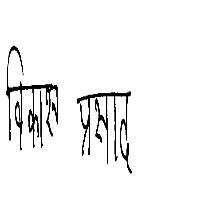

1/1 [==============================] - 0s 28ms/step
Predicted Label: Forged
Actual Label: Forged


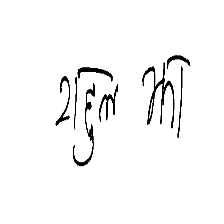

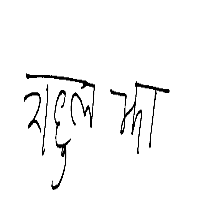

1/1 [==============================] - 0s 29ms/step
Predicted Label: Forged
Actual Label: Forged


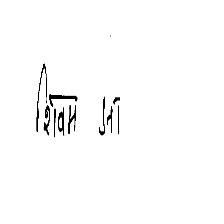

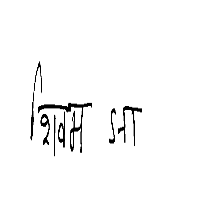

1/1 [==============================] - 0s 32ms/step
Predicted Label: Forged
Actual Label: Forged


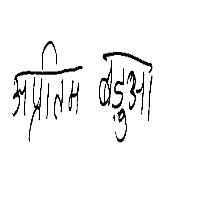

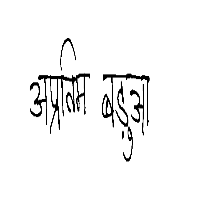

1/1 [==============================] - 0s 33ms/step
Predicted Label: Forged
Actual Label: Forged


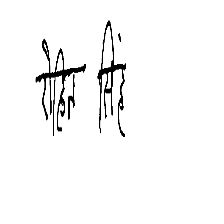

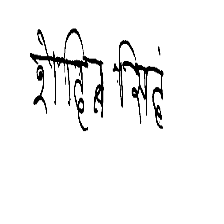

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


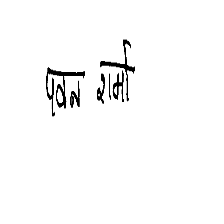

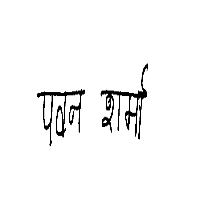

1/1 [==============================] - 0s 30ms/step
Predicted Label: Forged
Actual Label: Forged


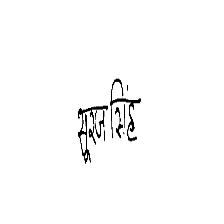

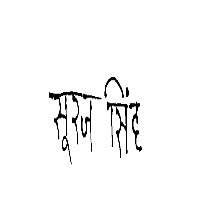

1/1 [==============================] - 0s 27ms/step
Predicted Label: Forged
Actual Label: Forged


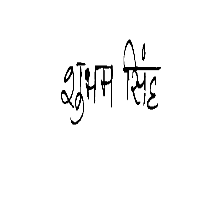

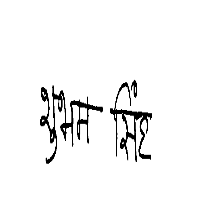

1/1 [==============================] - 0s 31ms/step
Predicted Label: Forged
Actual Label: Forged


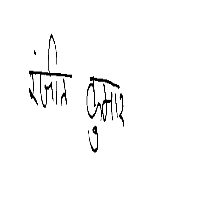

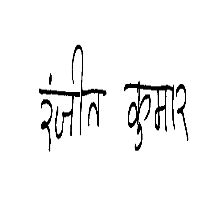

1/1 [==============================] - 0s 34ms/step
Predicted Label: Forged
Actual Label: Forged


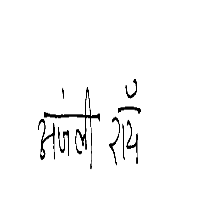

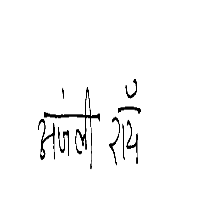

1/1 [==============================] - 0s 28ms/step
Predicted Label: Genuine
Actual Label: Genuine


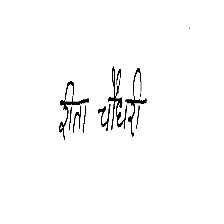

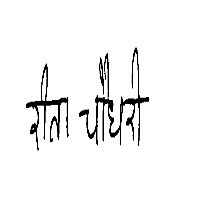

1/1 [==============================] - 0s 35ms/step
Predicted Label: Forged
Actual Label: Forged


In [ ]:
for (img1,img2,y) in zip(test_input,test_val,y_true):
  cv2_imshow(img1)
  cv2_imshow(img2)
  pred_val = model.predict([tf.expand_dims(img1,axis=0),tf.expand_dims(img2,axis=0)])[0][0]
  pred_ans = ""
  if pred_val>0.5:
    pred_ans="Genuine"
  else:
    pred_ans='Forged'
  print("Predicted Label: {}".format(pred_ans))
  res = ""
  if y==1:
    res="Genuine"
  else:
    res="Forged"
  print("Actual Label: {}".format(res))
  # print("Cosine Similarity: {}".format(cosine(embedding(tf.expand_dims(img1,axis=0)),embedding(tf.expand_dims(img2,axis=0)))))

Training Accuracy: 71%
Test Accuracy: 73%

- Siamese Model performs better with contrastive loss compared to binary cross entropy


- As we discussed above, Contrastive loss requires 2 inputs, **(anchor, positive)** or **(anchor, negative)**.


### Why contrastive loss is not the best?

- While contrastive loss is useful, it has a limitation.
- In **Contrastive Loss**, it is already satisfied when different samples are easily distinguishable from similar ones.
- For points in a negative pair, contrastive loss will push them far apart without any knowledge of the broader embedding space.
- For example: imagine we have 10 classes, and each time we see class 1 and 2, we want to push them far apart; a result of this is that 1 might now become farther from 2 on the average, but might overlap with other classes (such as class 3, 4, 5, etc.)
- In **Triplet loss** it doesn't urge encoding anchor and positive sample in the same point within the vector space, unlike the contrastive loss.
- Also, it allows minor differences between similar samples from the same category.


#### How can we use triplet loss to solve this problem?

#### **Quiz-3**

The formula for the contrastive loss, the function that is used in the siamese network for calculating image similarity, is defined as following:

> $D^2+(1-Y)*max(margin-D,0)^2$

(a) Margin is a constant that we use to enforce a maximum distance between the two images in order to consider them similar or different from one another.

(b) Ds are 1 if images are similar, 0 if they are not.

(c) If the euclidean distance between the pair of images is low then it means the images are similar.

(d) Y is the tensor of details about image similarities.

**Answer:** (c),(d)

# **What is triplet loss?**

<center><img src="https://drive.google.com/uc?id=1iX5kKxAchdXX-JtSSnde4Lm-Z4m72AW-" width=600 height=400>

- The triplet loss function is an alternative to the contrastive loss function.
   - https://arxiv.org/pdf/1503.03832.pdf

- It has convergence advantages over contrastive loss function

- The triplet loss function compares a baseline input to positive input and a negative input in machine learning algorithms.

- For triplet loss, we need a triplet with 3 data points,
 - **Anchor (A):** The main data point.
 - **Positive (P):** A data point similar to Anchor.
  - **Negative (N):** A different data point than Anchor.

- The distance between the baseline input and the positive input is reduced to a minimum, while the distance between the baseline input and the negative input is increased.

> $(f(A)-f(P))^2<(f(A)-f(N))^2$

- In distance function terms, we can say the following:

> $d(A,P)-d(A,N)<0$

- As we don't want a Siamese network to learn $f(X)=0, X \in R$, we will add the margin, similar to a contrastive loss function:

> $d(A,P)-d(A,N)+\alpha<0$

- Using the following equations, we will define triplet loss as follows:

> $L(A,P,N)=max(0,d(A,P)-d(A,N)+\alpha)$

where $d(A,P)$ is anchor-to-positive-distance and $d(A,N)$ is anchor-to-negative-distance and $\alpha$ is the margin.

-  With this loss formulation, we can create three different types of triplet combinations based on how we sample:
 - **Easy triplets**: result when $d(A,N)>d(A,P)+\alpha$. Here, the sampled anchor-to-negative distance is already large enough so loss is 0, and the network has nothing to learn from.
 - **Hard triplets**: result when $d(A,N)<d(A,P)$. In this case, the anchor-to-negative distance is less than the anchor-to-positive distance, meaning high loss to backpropagation through the network.
 - **Semi-hard triplets**: result when $d(A,P)<d(A,N)<d(A,P)+\alpha$. Semi-hard triplets occur when the negative example is more distant to the anchor than the positive example, but the distance is not greater than the margin. This, therefore, results in a positive loss (i.e., the negative is far … but not far enough.)
<center><img src="https://drive.google.com/uc?id=1z4vkRXzcr-eZW3UMK5qN-2LAwIPbN6T0" width=400>

How the loss value changes during the training?

- The triplet loss function aims to learn a distance between representations such that the anchor-to-positive distance is less than the anchor-to-negative distance.
- Similar to contrastive loss, a margin value is imposed on the anchor-to-negative distance so that once negative representations have enough distance between them, no further effort is taken to increase distance between them.

<center><img src="https://drive.google.com/uc?id=1Oge3dQ5TqQPmNnYyXRy85dRbC7l-_flr" width=600 height=400></center>

**Triplet Loss** is defined as

> $L(A,P,N)=max(0,d(A,P)-d(A,N)+\alpha)$

Now lets implement a custom function for triplet loss to understand how triplet loss works

In [ ]:
def triplet_loss(y_true, y_pred):
    # Initialize alpha value
    alpha = 0.5
    # Getting anchor, positive and negative embeddings
    anchor, positive, negative =y_pred[0,0:512], y_pred[0,512:1024], y_pred[0,1024:1536]
    # Calculating distance between anchor and positive
    positive_distance = K.mean(K.square(anchor - positive),axis=-1)
    # Calculating distance between anchor and negative
    negative_distance = K.mean(K.square(anchor - negative),axis=-1)
    # Implement the formula
    return K.mean(K.maximum(0.0, positive_distance - negative_distance + alpha))

- In triplet loss, we need images in the form of triplets (anchor,positive,negative) where anchor and postive are similar and negative is different.
- We will build a **tf.data()** pipeline to build the dataset required for triplet loss

As you can see below, the positive and anchor image are same but the negative image is different. That's what we want

In [ ]:
anchor_images[500]

'./signatures/BHSig260/Hindi/021/H-S-21-G-21.tif'

In [ ]:
positive_images[500]

'./signatures/BHSig260/Hindi/021/H-S-21-G-21.tif'

In [ ]:
negative_images[500]

'./signatures/BHSig260/Hindi/021/H-S-21-F-21.tif'

Displaying a sample of anchor, positive and negative image

In [ ]:
img1 = mpimg.imread(anchor_images[1999])
img2 = mpimg.imread(positive_images[1999])
img3 = mpimg.imread(negative_images[1999])

Anchor Image

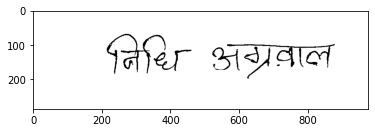

In [ ]:
plt.imshow(img1)

Positive Image

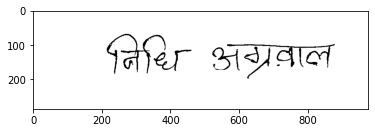

In [ ]:
plt.imshow(img2)

Negative Image

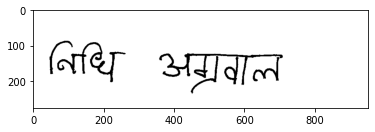

In [ ]:
plt.imshow(img3)

**tf.data.Dataset.zip()** is used for creating dataset by zipping together multiple arrays and tf objects.

In [ ]:
dataset = tf.data.Dataset.zip((anchor_dataset,positive_dataset,negative_dataset))

**preprocess_image()** - Load the specified file as a JPEG image, preprocess it and resize it to the target shape.

**preprocess_triplets** - Preprocess the image and return as a triplet

In [ ]:
def preprocess_triplets(anchor, positive, negative):

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )

Sample triplet of anchor,positve,negative

In [ ]:
sample = dataset.as_numpy_iterator().next()

In [ ]:
sample

(b'./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif',
 b'./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif',
 b'./signatures/BHSig260/Hindi/001/H-S-1-F-01.tif')

- **.shuffle()** - shuffles the samples in the dataset.

- **.map()** - transforms items in the dataset

In [ ]:
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

In [ ]:
image_count = len(anchor_images)

Taking 80% of dataset as training and remaining 20% for validation

In [ ]:
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

**Visualize a few triplets from the supplied batches.**

In [ ]:
def visualize(anchor, positive, negative):

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], np.clip(anchor[i],0,1))
        show(axs[i, 1], np.clip(positive[i],0,1))
        show(axs[i, 2], np.clip(negative[i],0,1))


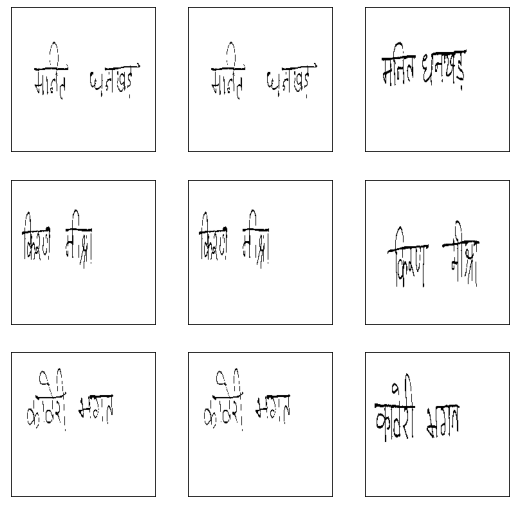

In [ ]:
visualize(*list(train_dataset.take(1).as_numpy_iterator())[0])

Now lets build the Base CNN for extracting embeddings from the images

As we know that, we can build the Base CNN using the following ways

 - CNN from scratch
 - Using Pre-trained models (Transfer learning)

For Binary cross-entropy and contrastive loss, we had used ResNet-50 as Base CNN to extract embedding. Now lets use another pretrained model **VGG19** as our Base CNN

**Note:** Try different pre-trained models to check the performance of the model

As we already know, the triplets can be classified as:
- Easy triplets
- Hard triplets
- Semi-Hard triplets

### Which triplets are suitable for training the model?
- In **easy triplets**, the negative sample is already sufficiently distant to the anchor sample respect to the positive sample in the embedding space.
- So easy triplets should be avoided, since their resulting loss will be 0.
- Since the loss is 0, there's no information available to adjust the weights of the model during training.
- Instead, we want to focus on the triplets with the most information, these are the so-called **hard triplets**.

Here, we will train the model using **tfa.losses.TripletHardLoss()** [Click to Know more](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/TripletHardLoss)

In [ ]:
target_shape=(224,224)

In [ ]:
# VGG19 Model
base_cnn = applications.vgg19.VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3),pooling='max')
for layer in base_cnn.layers[:15]:
    layer.trainable = False

flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(512, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001))(flatten)
dense1 = layers.Dropout(0.3)(dense1)
dense2 = layers.Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense1)
dense2 = layers.Dropout(0.2)(dense2)
output = layers.Dense(256)(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")


# Inputs for Anchor, positive and negative images
anchor_in = Input(name='anchor',shape=target_shape+(3,))
pos_in = Input(name='positive',shape=target_shape+(3,))
neg_in = Input(name='negative',shape=target_shape+(3,))

# Extract embeddings using VGG19
anchor_out = embedding(anchor_in)
pos_out = embedding(pos_in)
neg_out = embedding(neg_in)
# Concatenate the embeddings
merged_vector = concatenate([anchor_out, pos_out, neg_out],axis=1)

# Define the model
model_triplet_loss = Model(inputs=[anchor_in, pos_in, neg_in], outputs=merged_vector)

# Compiling the model using Adam optimizer and triplet loss
model_triplet_loss.compile(optimizer=Adam(lr=0.0001),loss=tfa.losses.TripletHardLoss())

In [ ]:
for i in range(10):
  model_triplet_loss.fit(next(iter(train_dataset)),np.ones(shape=32),validation_data=(next(iter(val_dataset)),np.ones(shape=32)),epochs=5,steps_per_epoch=30)

Epoch 1/5
30/30 [==============================] - 6s 121ms/step - loss: 1.8114 - val_loss: 1.7654
Epoch 2/5
30/30 [==============================] - 3s 102ms/step - loss: 1.7250 - val_loss: 1.6834
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.6593

30/30 [==============================] - 2s 76ms/step - loss: 1.6593 - val_loss: 1.6333
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 1.5995 - val_loss: 1.5646
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.5342 - val_loss: 1.5028
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.4847

30/30 [==============================] - 2s 76ms/step - loss: 1.4847 - val_loss: 1.4651
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 1.4397 - val_loss: 1.4134
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.3906 - val_loss: 1.3670
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.3534

30/30 [==============================] - 2s 76ms/step - loss: 1.3534 - val_loss: 1.3387
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 1.3197 - val_loss: 1.3000
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.2829 - val_loss: 1.2653
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.2551

30/30 [==============================] - 2s 76ms/step - loss: 1.2551 - val_loss: 1.2442
Epoch 1/5
30/30 [==============================] - 3s 98ms/step - loss: 1.2300 - val_loss: 1.2154
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.2027 - val_loss: 1.1896
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.1821

30/30 [==============================] - 2s 75ms/step - loss: 1.1821 - val_loss: 1.1741
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 1.1636 - val_loss: 1.1528
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.1435 - val_loss: 1.1339
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.1284

30/30 [==============================] - 2s 76ms/step - loss: 1.1284 - val_loss: 1.1225
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 1.1149 - val_loss: 1.1070
Epoch 2/5
30/30 [==============================] - 3s 94ms/step - loss: 1.1003 - val_loss: 1.0933
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.0894

30/30 [==============================] - 2s 67ms/step - loss: 1.0894 - val_loss: 1.0851
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 1.0796 - val_loss: 1.0739
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.0691 - val_loss: 1.0641
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.0613

30/30 [==============================] - 2s 76ms/step - loss: 1.0613 - val_loss: 1.0582
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 1.0543 - val_loss: 1.0503
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.0469 - val_loss: 1.0434
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.0414

30/30 [==============================] - 2s 68ms/step - loss: 1.0414 - val_loss: 1.0393
Epoch 1/5
30/30 [==============================] - 3s 111ms/step - loss: 1.0365 - val_loss: 1.0337
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 1.0313 - val_loss: 1.0289
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.0275

30/30 [==============================] - 2s 76ms/step - loss: 1.0275 - val_loss: 1.0260


- At this point, we can check how the network learned to separate the embeddings depending on whether they belong to similar images.

- We can use **cosine similarity** to measure the similarity between embeddings.

- Let's pick a sample from the dataset to check the similarity between the embeddings generated for each image.

- Finally, we can compute the cosine similarity between the anchor and positive images and compare it with the similarity between the anchor and the negative images.

- We should expect the similarity between the anchor and positive images to be larger than the similarity between the anchor and the negative images.

In [ ]:
cosine = metrics.CosineSimilarity()

In [ ]:
for i in range(5):
  sample = next(iter(val_dataset))
  # print(siamese_model.predict(sample))
  anchor, positive, negative = sample
  anchor_embedding, positive_embedding, negative_embedding = (
    embedding(anchor),embedding(positive),embedding(negative)
)
  print("Positive Similarity: {}".format(cosine(anchor_embedding,positive_embedding)))
  print("Negative Similarity: {}".format(cosine(anchor_embedding,negative_embedding)))
  print()

Positive Similarity: 1.0
Negative Similarity: 0.9010851979255676

Positive Similarity: 0.9340567588806152
Negative Similarity: 0.9022576212882996

Positive Similarity: 0.9218061566352844
Negative Similarity: 0.9011077880859375

Positive Similarity: 0.9152352213859558
Negative Similarity: 0.8998563289642334

Positive Similarity: 0.9109833836555481
Negative Similarity: 0.9020770788192749



### Lets Visualize the Embeddings
- 5 persons signature have been added 4 times each.
- So there are 4x5=20 signatures.
- Similar signatures have similar embeddings, so similar signatures are grouped into single cluster.
- Finally only 5 clusters are visible, which means 5 persons

In [ ]:
results = []
for i in range(5):
  sample = next(iter(train_dataset))
  res = model_triplet_loss.predict(sample)
  results.append(res[0])
  results.append(res[0])
  results.append(res[0])
  results.append(res[0])

1/1 [==============================] - 0s 51ms/step


In [ ]:
# Save test embeddings for visualization in projector
np.savetxt("vecs.tsv", results, delimiter='\t')

<img src="https://drive.google.com/uc?id=1jNb2UnJsWoTcpP_nYXVMoVes9__s1FaP" width=600>

### What is the problem with triplet loss?

So what is the problem, it seems to work fine, doesn’t it?

- The issue is with this line of the loss function.
```
loss = K.maximum(basic_loss,0.0)
```
- There is a major issue here, every time your loss gets below 0, you lose information, a ton of information. First let’s look at this function.


- It basically does this:

<img src="https://drive.google.com/uc?id=1ej1BjkTxwFf_SUke0GxhlJyGOUbnlekC">

- It tries to bring close the Anchor (current image) with the Positive (A image that is similar with the Anchor) as far as possible from the Negative (A image that is different from the Anchor)

The actual formula for this loss is:
$L(A,P,N)=max(0,d(A,P)-d(A,N)+\alpha)$


Let’s pretend that:
- Alpha is 0.2
- Negative Distance is 2.4
- Positive Distance is 1.2

 - The loss function result will be 1.2–2.4+0.2 = -1.

 - Then when we look at Max(-1,0) we end up with 0 as a loss.

 - The Positive Distance could be anywhere above 1 and the loss would be the same.

 - With this reality, it’s going to be very hard for the algorithm to reduce the distance between the Anchor and the Positive value.

As a more visual example, here is 2 scenarios A and B. They both represent what the loss function measure for us.

<img src="https://drive.google.com/uc?id=1dtzGxkuZE0lBBd_gj_JlWKyuNdUMj1GH">

> $A=1.2-2.4-0.4=-1.6$

> $B=0.2-2.4-0.4=-2.6$

- After the Max function both A and B now return 0 as their loss, which is a clear lost of information.
- By looking simply, we can say that B is better than A.

> To make a loss function that will capture the “lost” information below 0.
-If you contain the N dimension space where the loss is calculated you can more efficiently control this.
- So the first step was to modify the model.
- The last layer (Embedding layer) needed to be controlled in size.
-By using a Sigmoid activation function instead of a linear we can guarantee that each dimension will be between 0 and 1.








So Lets change the activation function to sigmoid in the last layer of the embeddings

#### **Quiz-4**

How to make the triplet loss capture the lost information below 0?

(a) Increasing the number of neurons in the last layer of the embedding.

(b) Controlling the size of last layer of embedding by using sigmoid activation function instead of linear.

(c) Using tanh activation function in the last layer of the embedding

**Answer:** (b)

In [ ]:
# VGG19 Model
base_cnn = applications.vgg19.VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3),pooling='max')
for layer in base_cnn.layers[:15]:
    layer.trainable = False

flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(128, activation="relu")(flatten)
dense2 = layers.Dropout(0.3)(dense1)
output = layers.Dense(512,activation='sigmoid')(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")


# Inputs for Anchor, positive and negative images
anchor_in = Input(name='anchor',shape=target_shape+(3,))
pos_in = Input(name='positive',shape=target_shape+(3,))
neg_in = Input(name='negative',shape=target_shape+(3,))

# Extract embeddings using VGG19
anchor_out = embedding(anchor_in)
pos_out = embedding(pos_in)
neg_out = embedding(neg_in)
# Concatenate the embeddings
merged_vector = concatenate([anchor_out, pos_out, neg_out],axis=1)

# Define the model
model_lossless_triplet_loss = Model(inputs=[anchor_in, pos_in, neg_in], outputs=merged_vector)

Now, we have changed the activation function of the last layer of the embedding to **sigmoid activation**

But, the problem with triplet loss is
- loss becomes zero when trained for more epochs

### How can we solve this?

- We can create a loss function which breaks the linearity in cost function.
- In other words, make it really costly as more the error grows.

Here comes the **lossless triplet loss**

It is defined as

$\sum_{i=1} ^{n}[-ln(-\frac{(f^a_{i}-f^p_{i})^2}{\beta})+1+\epsilon)-ln(-\frac{N-(f^a_{i}-f^n_{i})^2}{\beta})+1+\epsilon)]$

- Where N is the number of dimensions (Number of output of your network; Number of features for your embedding)
- β is a scaling factor.
- $\epsilon$ is the margin
- $(f^a_{i}-f^p_{i})^2$ is the distance between anchor and positive
- $(f^a_{i}-f^n_{i})^2$ is the distance between anchor and negative



In [ ]:
# Custom Function for lossless triplet loss
def lossless_triplet_loss(y_true, y_pred, beta=3, epsilon=1e-8):
    anchor, positive, negative =y_pred[0,0:512], y_pred[0,512:1024], y_pred[0,1024:1536]

    pos_dist = K.mean(K.square(anchor - positive),axis=-1)
    neg_dist = K.mean(K.square(anchor - negative),axis=-1)

    N=3
    pos_dist = -tf.math.log(-tf.divide((pos_dist),beta)+1+epsilon)
    neg_dist = -tf.math.log(-tf.divide((N-neg_dist),beta)+1+epsilon)
    loss = neg_dist + pos_dist

    return loss

In [ ]:
# Compiling the model using Adam optimizer and lossless triplet loss
model_lossless_triplet_loss.compile(optimizer=Adam(lr=0.00001),loss=lossless_triplet_loss)

In [ ]:
target_shape=(224,224)

In [ ]:
for i in range(10):
  model_lossless_triplet_loss.fit(next(iter(train_dataset)),np.ones(shape=32),validation_data=(next(iter(val_dataset)),np.ones(shape=32)),epochs=5,steps_per_epoch=30)

Epoch 1/5
30/30 [==============================] - 5s 120ms/step - loss: 2.5149 - val_loss: 2.7285
Epoch 2/5
30/30 [==============================] - 3s 102ms/step - loss: 2.3638 - val_loss: 2.8691
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 2.2709

30/30 [==============================] - 2s 76ms/step - loss: 2.2709 - val_loss: 2.6856
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 2.3057 - val_loss: 2.7071
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 2.2479 - val_loss: 2.6519
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 2.1871

30/30 [==============================] - 2s 76ms/step - loss: 2.1871 - val_loss: 2.5207
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 2.1829 - val_loss: 2.3527
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 2.1602 - val_loss: 2.3616
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 2.0724

30/30 [==============================] - 2s 76ms/step - loss: 2.0724 - val_loss: 2.3022
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 2.1560 - val_loss: 2.0830
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 2.1100 - val_loss: 2.1189
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 2.0523

30/30 [==============================] - 2s 76ms/step - loss: 2.0523 - val_loss: 2.0746
Epoch 1/5
30/30 [==============================] - 3s 105ms/step - loss: 2.0859 - val_loss: 2.4557
Epoch 2/5
30/30 [==============================] - 3s 103ms/step - loss: 2.0459 - val_loss: 2.2917
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 2.0005

30/30 [==============================] - 2s 77ms/step - loss: 2.0005 - val_loss: 2.2579
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 2.0899 - val_loss: 2.1675
Epoch 2/5
30/30 [==============================] - 3s 104ms/step - loss: 2.1075 - val_loss: 2.1814
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.9901

30/30 [==============================] - 2s 76ms/step - loss: 1.9901 - val_loss: 1.9700
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 1.9960 - val_loss: 1.8775
Epoch 2/5
30/30 [==============================] - 3s 104ms/step - loss: 1.9809 - val_loss: 1.9280
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.9406

30/30 [==============================] - 2s 77ms/step - loss: 1.9406 - val_loss: 1.6958
Epoch 1/5
30/30 [==============================] - 3s 107ms/step - loss: 1.9372 - val_loss: 2.2604
Epoch 2/5
30/30 [==============================] - 3s 95ms/step - loss: 1.8986 - val_loss: 2.3829
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.8686

30/30 [==============================] - 2s 68ms/step - loss: 1.8686 - val_loss: 2.0025
Epoch 1/5
30/30 [==============================] - 3s 106ms/step - loss: 1.9176 - val_loss: 1.6125
Epoch 2/5
30/30 [==============================] - 3s 96ms/step - loss: 1.9150 - val_loss: 1.5978
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.9050

30/30 [==============================] - 2s 76ms/step - loss: 1.9050 - val_loss: 1.5991
Epoch 1/5
30/30 [==============================] - 3s 107ms/step - loss: 1.8945 - val_loss: 1.6365
Epoch 2/5
30/30 [==============================] - 3s 95ms/step - loss: 1.9267 - val_loss: 1.6014
Epoch 3/5
20/30 [===================>..........] - ETA: 0s - loss: 1.8977

30/30 [==============================] - 2s 76ms/step - loss: 1.8977 - val_loss: 1.6770


In [ ]:
for i in range(5):
  sample = next(iter(val_dataset))
  # print(siamese_model.predict(sample))
  anchor, positive, negative = sample
  anchor_embedding, positive_embedding, negative_embedding = (
    embedding(anchor),embedding(positive),embedding(negative)
)
  print("Positive Similarity: {}".format(cosine(anchor_embedding,positive_embedding)))
  print("Negative Similarity: {}".format(cosine(anchor_embedding,negative_embedding)))
  print()

Positive Similarity: 0.9344238638877869
Negative Similarity: 0.9138036370277405

Positive Similarity: 0.9188740253448486
Negative Similarity: 0.8987343311309814

Positive Similarity: 0.9040640592575073
Negative Similarity: 0.8845627903938293

Positive Similarity: 0.890059769153595
Negative Similarity: 0.8741994500160217

Positive Similarity: 0.8796690106391907
Negative Similarity: 0.8678867220878601



**Conclusion**

- As you can see above, when the model is trained with triplet loss and lossless triplet loss, the embeddings learn to differentiate between the similar images and dis-similar images clearly.

- Lossless triplet loss is better than the standard triplet loss because:
 - In **Standard triplet loss**, if loss value becomes negative then, it'll be zero, which is a clear lost of information
 - In **lossless triplet loss**, the non-linearity is introduced which makes it really costly as more the error grows.

- So, we can say that **Lossless Triplet Loss** is the best loss function for pairwise learning which can be used in siamese network for best performance.


## Summary

- A **Siamese neural network** is an artificial neural network that contains two or more identical subnetwork which is also known as twin neural network or sister network.

- Siamese network takes two different inputs passed through two similar subnetworks with the same architecture, parameters, and weights.

- Siamese network’s objective is to classify if the two inputs are the same or different using the Similarity score.

- The Similarity score can be calculated using **Binary cross-entropy**, **Contrastive function**, or **Triplet loss**, which are techniques for the general distance metric learning approach.

- Since training of Siamese networks involves pairwise learning usual, Cross entropy loss cannot be used in this case, mainly two loss functions are used, they are
 - **Contrastive loss**
 - **Triplet loss**

- **Contrastive loss** is a metric learning objective function where we learn from training data examples structured as pairs:
 - Positive pairs (examples that belong to the same class)
 - Negative pairs (examples that belong to different classes).

- The contrastive loss function is set up such that we minimize the distance between embeddings for positive pairs, and maximize the distance between embeddings for negative pairs.

- The **triplet loss** function is an alternative to the contrastive loss function. It has convergence advantages over contrastive loss function

- The distance between the baseline input and the positive input is reduced to a minimum, while the distance between the baseline input and the negative input is increased.

- The triplet loss function aims to learn a distance between representations such that the anchor-to-positive distance is less than the anchor-to-negative distance.